# **Hill and Valley Prediction using Logistics Regression**

## Get understanding about Data set

Each Record re-present 100 points on a two-dimensional grap.When plottod in order (from 1 to 100) as y-coordinate, the point will create either a Hill (a "bump" in the terrain) or a Valley (a "dip" in the terrain). See the original source for some example of these graphs.

**1-100:** Labeled "V##".Floting point values(numeric),the X-value
**101:** Labeled "Class".Binary{0,1} representing {valley, hill}

## **Import Library**

In [1]:
import pandas as pd
import numpy as np

## **Import Data**

In [3]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Hill%20Valley%20Dataset.csv')

## **Get the First Five Rows of Dataframe**

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


## **Get Information of DataFrame**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


## **Get the Summary Statics**

In [6]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


## **Get Column Names**

In [7]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

## **Get Shape of DataFrame**

In [8]:
df.shape

(1212, 101)

## **Get Unique Values (Class or Lable) in y Variable**

In [9]:
df['Class'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       1
3       0
4       0
       ..
1207    1
1208    0
1209    1
1210    1
1211    0
Name: Class, Length: 1212, dtype: int64>

## **Define y(dependent or lable value) and X(independent or features or attribute Variable)**

In [11]:
y=df['Class']

In [13]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1207    1
1208    0
1209    1
1210    1
1211    0
Name: Class, Length: 1212, dtype: int64

In [14]:
X = df.drop('Class',axis=1)

In [15]:
X.shape

(1212, 100)

In [16]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,37.57,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.71,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,69384.71,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,47653.60,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.52,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.89,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,47.45,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,10413.41,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,33.18,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82


#**Get Plot of First Two Rows**

In [17]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Valley')

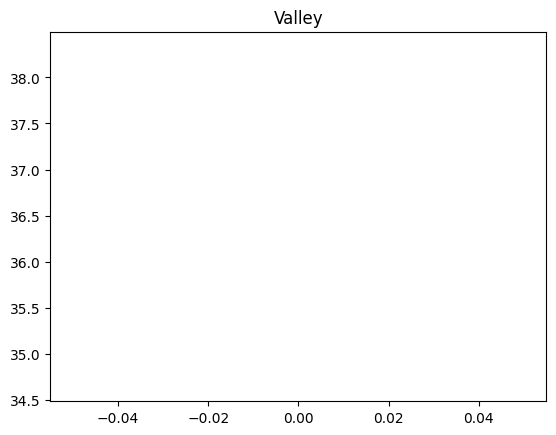

In [18]:
plt.plot(X.iloc[0,1])
plt.title('Valley')

Text(0.5, 1.0, 'Hill')

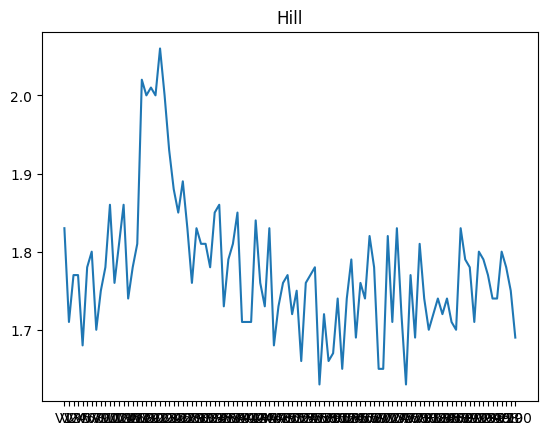

In [19]:
plt.plot(X.iloc[1,:])
plt.title('Hill')

#**Get X Variable Stsndardized**

Standardization of dataset is a common requirement for many machine learning estimators implemented in a scikit-learn; they might behave badly if the individual features do not more or less look like a standard normally distributed data: Gaussian with zero mean and unit variance.
Next approach is go for MinMax Scaler

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()

In [22]:
X = ss.fit_transform(X)

In [23]:
X

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

In [24]:
X.shape

(1212, 100)

## **Get Train Split**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3, stratify=y, random_state=2529)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((848, 100), (364, 100), (848,), (364,))

#**Get Model Train**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(X_train, y_train)

LogisticRegression()

#**Get Model Prediction**

In [31]:
y_pred= lr.predict(X_test)

In [33]:
y_pred.shape

(364,)

In [34]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,

#**Get Probability of Each Predicted Class**

In [35]:
lr.predict_log_proba(X_test)

array([[-5.73823216e-01, -8.28663263e-01],
       [-6.86627707e-01, -6.99709436e-01],
       [-5.54315855e-01, -8.54408417e-01],
       [-6.78504403e-01, -7.08007559e-01],
       [-6.77914233e-01, -7.08615765e-01],
       [-6.75883850e-01, -7.10713777e-01],
       [-6.77407359e-01, -7.09138711e-01],
       [-5.04878061e-01, -9.25278931e-01],
       [-6.73155253e-01, -7.13546953e-01],
       [-6.74034283e-01, -7.12632510e-01],
       [-6.78825970e-01, -7.07676472e-01],
       [-6.63522000e-01, -7.23676878e-01],
       [-6.61840713e-02, -2.74822499e+00],
       [-6.73956065e-01, -7.12713813e-01],
       [-6.53831099e-01, -7.34072501e-01],
       [-3.04744162e-01, -1.33678820e+00],
       [-7.46776444e-01, -6.42248212e-01],
       [-6.77631229e-01, -7.08907676e-01],
       [-6.76051251e-01, -7.10540472e-01],
       [-6.76026175e-01, -7.10566428e-01],
       [-1.21160402e+00, -3.53422166e-01],
       [-9.60417693e-01, -4.82453589e-01],
       [-6.75987344e-01, -7.10606625e-01],
       [-1.

#**Get Model Evaluation**

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
print(confusion_matrix(y_test,y_pred))

[[181   1]
 [106  76]]


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       182
           1       0.99      0.42      0.59       182

    accuracy                           0.71       364
   macro avg       0.81      0.71      0.68       364
weighted avg       0.81      0.71      0.68       364



#**Get Future Prediction**

**Lets select a ramdom samole from existing dataset as new value**

Steps to follow

1.  Extract a random row using sample function
2.   Separate Xand y
3.   Standardize X
4.   Predict






In [39]:
X_new = df.sample(1)

In [40]:
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
483,15.11,14.55,14.12,14.08,15.18,15.11,13.55,15.12,15.21,14.93,...,13.58,14.27,14.84,13.74,13.82,14.0,13.71,15.19,14.52,0


In [41]:
X_new.shape

(1, 101)

In [45]:
X_new = X_new.drop('Class', axis = 1)

In [46]:
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
483,15.11,14.55,14.12,14.08,15.18,15.11,13.55,15.12,15.21,14.93,...,14.66,13.58,14.27,14.84,13.74,13.82,14.0,13.71,15.19,14.52


In [47]:
X_new.shape

(1, 100)

In [48]:
X_new= ss.fit_transform(X_new)

In [50]:
y_pred_new=lr.predict(X_new)

In [51]:
y_pred_new

array([1])

In [53]:
lr.predict_proba(X_new)

array([[0.49714993, 0.50285007]])